<a href="https://colab.research.google.com/github/tago893/capstone/blob/main/models/ARIMA_D2_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ethereum Predictions with ARIMA

Aim of the project: To increase the performance of the ARIMA to work as better as other existing time series analysis models. 

Summary:

This notebook examines Ethereum's projected price information. The notebook begins by setting up the required libraries, downloading the data using Pandas Datareader and the Yahoo Finance API, and performing initial data exploration and visualisation using different Python libraries, including Pandas, Matplotlib, Seaborn, and Plotly. After determining stationarity, the notebook breaks down the data into seasonal, trend, and residual components. The data is then subjected to Box-Cox transformation and differencing. Then we use a function that aids in the discovery of the best ARIMA model by employing the AIC criterion to determine the parameters that will allow ARIMA to most accurately predict future prices. Additionally, we implemented other models such as SARIMAX, Linear Regression, and FbProphet for comparison.


In [1]:
!pip install pandas-datareader
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 111.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 180.8 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beauti

In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() 

# download dataframe
data = pdr.get_data_yahoo("ETH-USD")

[*********************100%***********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-03-10,1438.760132,1438.760132,1378.525391,1429.158081,1429.158081,12665194936
2023-03-11,1429.100830,1484.136963,1428.723145,1482.616699,1482.616699,14917080154
2023-03-12,1482.431885,1607.152588,1461.610962,1590.292969,1590.292969,11480965122


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1952 entries, 2017-11-09 to 2023-03-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1952 non-null   float64
 1   High       1952 non-null   float64
 2   Low        1952 non-null   float64
 3   Close      1952 non-null   float64
 4   Adj Close  1952 non-null   float64
 5   Volume     1952 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 106.8 KB


In [7]:
data.dropna(inplace=True)
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Visualization


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

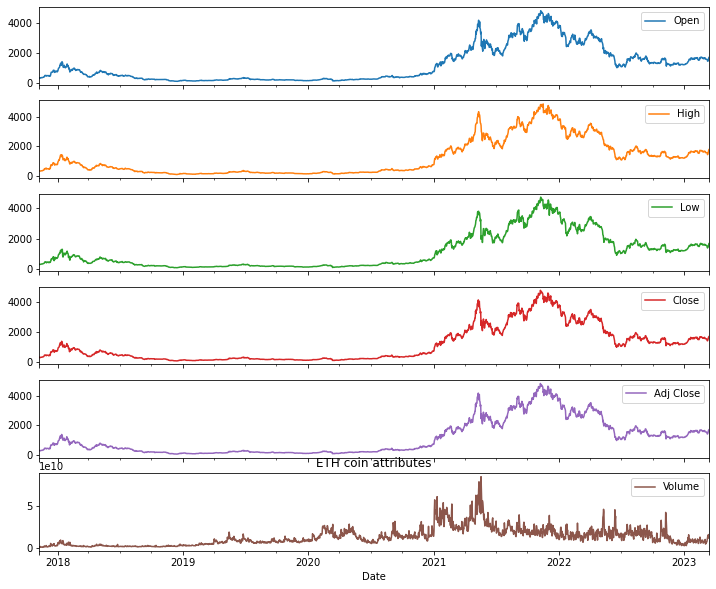

In [9]:
selected_columns = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']
data[selected_columns].plot(subplots=True, figsize=(12,10))
plt.title('ETH coin attributes')
plt.show()

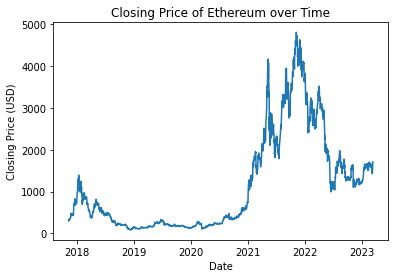

In [10]:
sns.lineplot(data=data['Close'])
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(16,8)})
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Closing Price of Ethereum over Time')
plt.show()

In [11]:
df2=pdr.get_data_yahoo("ETH-USD",)
del df2["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [12]:
df2.describe()

,Open,High,Low,Close,Volume
count,1952.000000,1952.000000,1952.000000,1952.000000,1.952000e+03
mean,1145.034415,1181.199919,1104.281180,1145.520454,1.271511e+10
std,1169.023833,1204.528762,1128.046769,1168.473606,1.064082e+10
min,84.279694,85.342743,82.829887,84.308296,6.217330e+08
25%,215.418018,220.810474,208.858681,215.468498,4.586400e+09
50%,569.931274,590.410492,550.178040,571.677338,1.031033e+10
75%,1702.938904,1756.868683,1665.358063,1704.824921,1.791963e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10


In [13]:
eth_data_v=df2.reset_index()
eth_data_v

,Date,Open,High,Low,Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...,...
1947,2023-03-10,1438.760132,1438.760132,1378.525391,1429.158081,12665194936
1948,2023-03-11,1429.100830,1484.136963,1428.723145,1482.616699,14917080154
1949,2023-03-12,1482.431885,1607.152588,1461.610962,1590.292969,11480965122
1950,2023-03-13,1590.831177,1699.911743,1572.074707,1680.308960,15711468959


In [14]:
# Create a market cap chart
eth_data_v['Market Cap'] = eth_data_v['Close'] * eth_data_v['Volume']
fig = go.Figure()
fig.add_trace(go.Scatter(x=eth_data_v['Date'], y=eth_data_v['Market Cap'], mode='lines'))
fig.update_layout(title='Ethereum Market Cap Chart', xaxis_title='Date', yaxis_title='Market Cap')
fig.show()

## Monthly Forecasting <a name="monthlyForecasting"></a>

This plot helps us visualize the max and min values of monthly helping us
infering that:

1. 30th november 2021 has the high maximum price and 31st december 2018 has high minimum price compared to other years
2. From year 2019 to 2020 the maximum and minimum closing prices of Ethereum closing price are near.

In [15]:
df2_month=df2.resample(rule="MS").mean()

In [16]:
df2_month

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-01,373.696317,393.111908,363.283635,379.732093,1.225341e+09
2017-12-01,630.583997,667.252580,596.163133,640.209291,2.576202e+09
2018-01-01,1093.099893,1163.799714,1024.934606,1103.646004,5.277749e+09
2018-02-01,882.527006,917.850394,825.723679,873.116318,2.978337e+09
2018-03-01,640.787129,653.875259,606.506935,625.761325,1.732780e+09
...,...,...,...,...,...
2022-11-01,1307.122107,1341.226990,1262.868237,1297.930184,1.405993e+10
2022-12-01,1240.294394,1255.038866,1221.342147,1237.105890,5.197763e+09
2023-01-01,1454.913763,1486.601736,1434.767791,1466.950026,7.256547e+09


<AxesSubplot:xlabel='Date'>

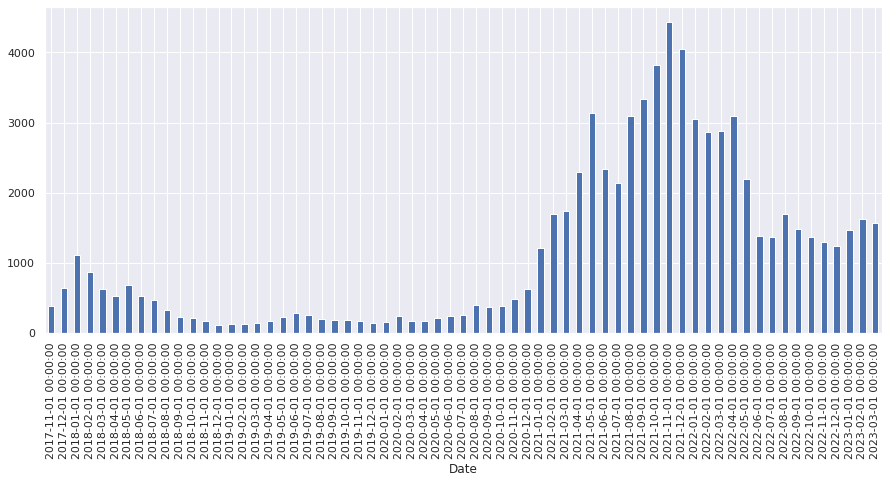

In [17]:
df2['Close'].resample(rule='MS').mean().plot(kind="bar",figsize=(15,6))

# Stationarity check and seasonal decomposition<a name="StationarityCheck"></a>

##Stationarity check

If a time series is stationary, it implies the lack of broad trends (changes in mean and variance over time) in the data. This is important as a consideration in time series forecasting.

In [18]:
import statsmodels.api as sm

<Figure size 2160x720 with 0 Axes>

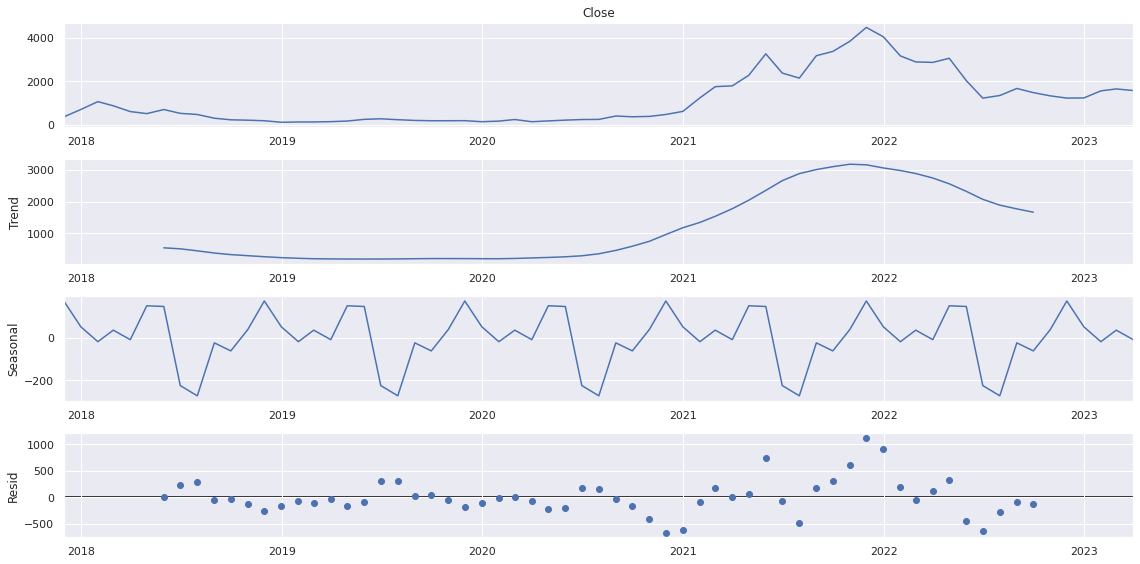

In [19]:
plt.figure(figsize=[30,10])
sm.tsa.seasonal_decompose(df2.resample(rule='M').median().Close).plot()
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adf_test(data['Close'])

ADF Statistics: -1.4046090520147565
p- value: 0.5800644972106556
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
df2_daily = df2.resample('D').mean()
df2_daily

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,8.932500e+08
2017-11-10,320.670990,324.717987,294.541992,299.252991,8.859860e+08
2017-11-11,298.585999,319.453003,298.191986,314.681000,8.423010e+08
2017-11-12,314.690002,319.153015,298.513000,307.907990,1.613480e+09
2017-11-13,307.024994,328.415009,307.024994,316.716003,1.041890e+09
...,...,...,...,...,...
2023-03-10,1438.760132,1438.760132,1378.525391,1429.158081,1.266519e+10
2023-03-11,1429.100830,1484.136963,1428.723145,1482.616699,1.491708e+10
2023-03-12,1482.431885,1607.152588,1461.610962,1590.292969,1.148097e+10


#Feature Engineering

## Box-Cox Transformation <a name="Transformation"></a>

Lets use the Box-Cox transformation to suppress some of the variance.

The Box-Cox transformation is a family of power transformations indexed by a parameter lambda. Whenever you use it the parameter needs to be estimated from the data. In time series the process could have a non-constant variance. if the variance changes with time the process is nonstationary. It is often desirable to transform a time series to make it stationary. Sometimes after applying Box-Cox with a particular value of lambda the process may look stationary. It is sometimes possible that even if after applying the Box-Cox transformation the series does not appear to be stationary, diagnostics from ARIMA modeling can then be used to decide if differencing or seasonal differencing might be useful to to remove polynomial trends or seasonal trends respectively. After that the result might be an ARMA model that is stationary. If diagnostics confirm the orders p and q for the ARMA model, the AR and MA parameters can then be estimated.

In [22]:
# Box-Cox Transformations
df2_daily['close_box'], lmbda = stats.boxcox(df2_daily.Close)
print("Dickey–Fuller test: p=%f" % adfuller(df2_daily.close_box)[1])

Dickey–Fuller test: p=0.787207


The p-value indicates that series is still not stationary.


## Seasonal decomposition

Dickey–Fuller test: p=0.580064


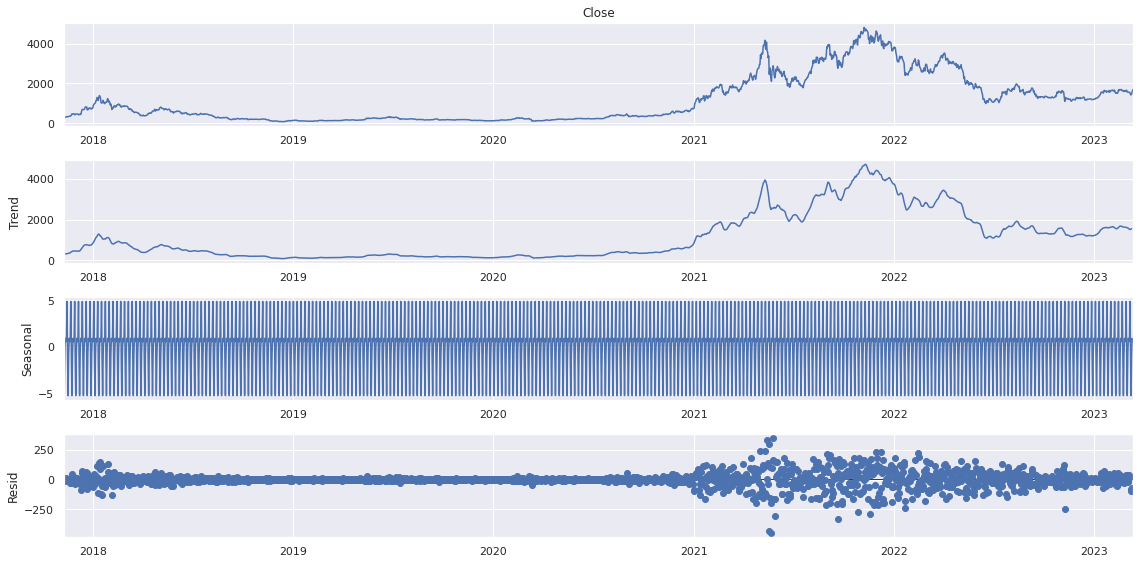

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df2.Close).plot()
print("Dickey–Fuller test: p=%f" % adfuller(data.Close)[1])
plt.show()

The p-value indicates that series is still not stationary.


## Differencing <a name="Differencing"></a>

When building models to forecast time series data (like ARIMA), another pre-processing step is differencing the data (calculating sequentially xt−xt−1) until we get to a point where the series is stationary. 


In [24]:
# Seasonal differentiation (12 months)
df2_daily['box_diff_seasonal_12'] = df2_daily.close_box - df2_daily.close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(df2_daily.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.000000


Dickey–Fuller test: p=0.000000


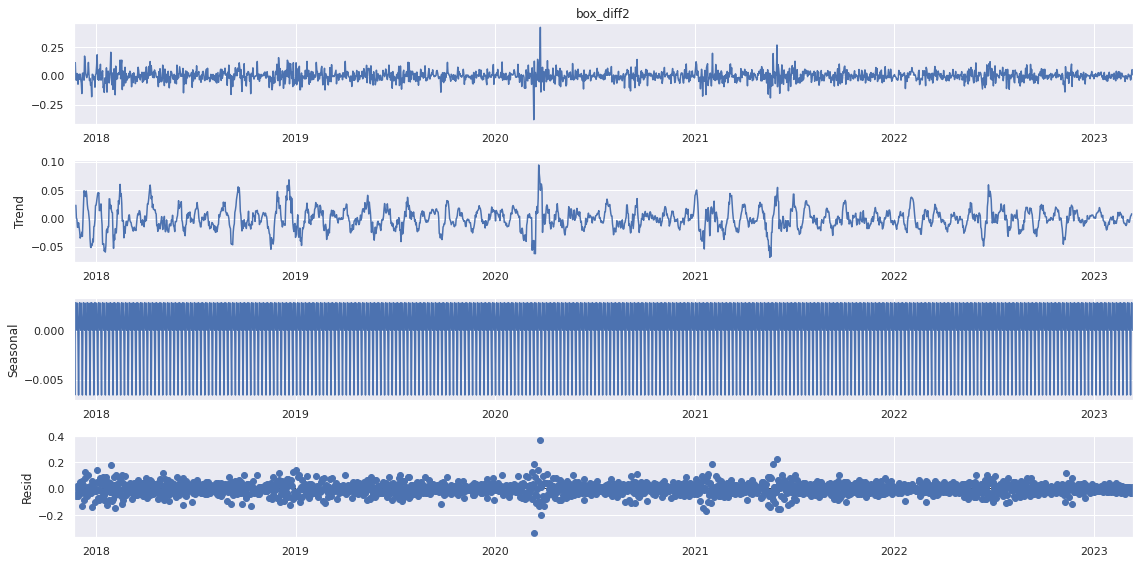

In [25]:
# Regular differentiation
df2_daily['box_diff2'] = df2_daily.box_diff_seasonal_12 - df2_daily.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(df2_daily.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(df2_daily.box_diff2[13:])[1])

plt.show()

The p-value indicates that series is stationary.


In [26]:
df2_daily.Close

Date
2017-11-09     320.884003
2017-11-10     299.252991
2017-11-11     314.681000
2017-11-12     307.907990
2017-11-13     316.716003
                 ...     
2023-03-10    1429.158081
2023-03-11    1482.616699
2023-03-12    1590.292969
2023-03-13    1680.308960
2023-03-14    1710.224609
Freq: D, Name: Close, Length: 1952, dtype: float64

## Autocorrelation  <a name="Autocorrelation"></a>

Autocorrelation is the correlation of a time series with the same time series lagged. It summarizes the strength of a relationship with an observation in a time series with observations at prior time steps.

We create autocorrelation factor (ACF) and partial autocorrelation factor (PACF) plots to identify patterns in the above data which is stationary on both mean and variance. The idea is to identify presence of AR and MA components in the residuals. 

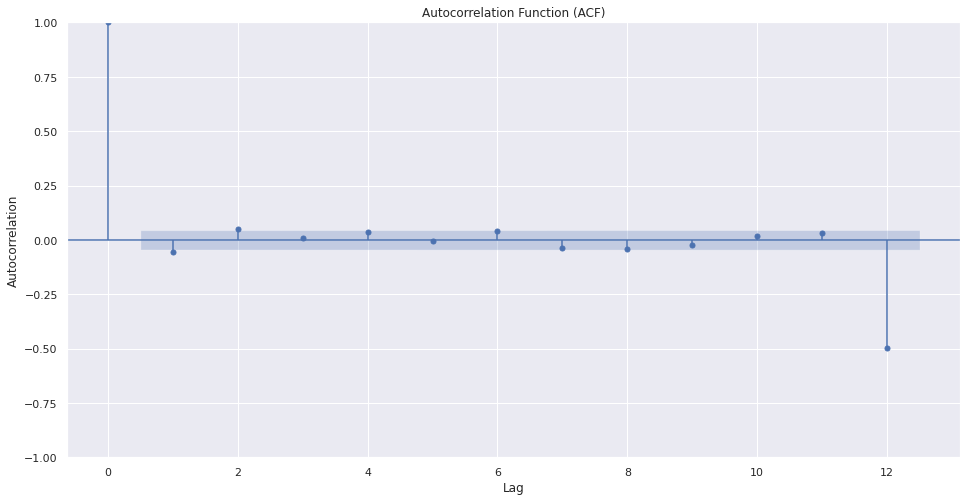

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



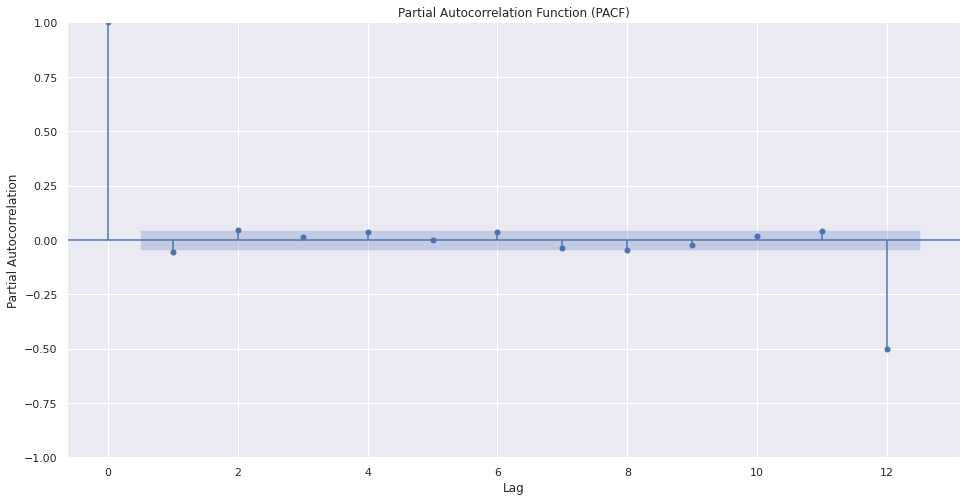

In [27]:
sm.graphics.tsa.plot_acf(df2_daily.box_diff2[13:], lags=12)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF)")
plt.show()
sm.graphics.tsa.plot_pacf(df2_daily.box_diff2[13:], lags=12)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


There are not many spikes in the plots outside the insignificant zone (shaded) so there may not be enough information available in the residuals to be extracted by AR and MA models. 

#Models

# ARIMA Model  <a name="ARIMAModel"/>
AutoRegressive Integrated Moving Average

ARIMA models are denoted with the notation ARIMA(p, d, q). These parameters account for seasonality, trend, and noise in datasets:

     

1.  p - the number of lag observations to include in the model, or lag order.(AR)
2.  d - the number of times that the raw observations are differenced, or the degree of differencing. (I)
3.  q - the size of the moving average window, also called the order of moving average.(MA)


A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.
A value of 0 for a parameter indicates to not use that element of the model. 

##Paramters configuration <a name="ParamtersconfigurationARIMA">

We will iteratively explore different combinations of parameters. For each combination we fit a new ARIMA model with SARIMAX() and assess its overall quality.

We will use the AIC (Akaike Information Criterion) value, returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Create a list of parameters to be used for model selection
ps = range(0, 4)
qs = range(0, 4)
d = 1
parameters = product(ps, qs)
parameters_list = list(parameters)

# Perform model selection using AIC
results=[]
best_aic = np.inf
for param in parameters_list:
    try:
        model = ARIMA(df2_daily.close_box, order=(param[0], d, param[1])).fit()
        aic = model.aic
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
    except:
        continue

In [29]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:              close_box   No. Observations:                 1952
Model:                 ARIMA(2, 1, 0)   Log Likelihood                3845.935
Date:                Tue, 14 Mar 2023   AIC                          -7685.870
Time:                        19:39:57   BIC                          -7669.142
Sample:                    11-09-2017   HQIC                         -7679.720
                         - 03-14-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0408      0.016     -2.596      0.009      -0.072      -0.010
ar.L2          0.0601      0.021      2.865      0.004       0.019       0.101
sigma2         0.0011   1.36e-05     83.710      0.0

## Analysis of Results  <a name="AnalysisARIMA"></a>



In [30]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.000000


##Prediction


In [31]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

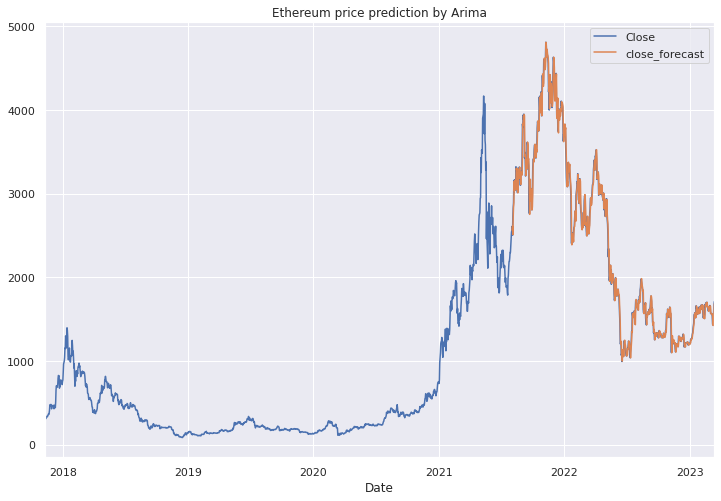

In [32]:
from plotly.subplots import make_subplots
# inverse Box-Cox transformation and plot predicted values
#Split data into training and testing sets
train_data, test_data = df2_daily['close_box'][:'2021-08-01'], df2_daily['close_box']['2021-08-02':]
df2_daily['close_box_diff_seasonal_12_forecast'] = best_model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)
df2_daily['close_forecast'] = invboxcox(df2_daily.close_box_diff_seasonal_12_forecast, lmbda)
df2_daily[['Close', 'close_forecast']].plot(figsize=(12, 8))
plt.title("Ethereum price prediction by Arima")
plt.show()


In [33]:
# Create a plot of the actual data and the predicted values
actual = go.Scatter(x=df2_daily.index, y=df2_daily['Close'], name='Actual')
predicted = go.Scatter(x=df2_daily.index, y=df2_daily['close_forecast'], name='Predicted')
layout = go.Layout(title='Predicted vs. Actual Ethereum Prices', xaxis=dict(title='Date'), yaxis=dict(title='Price (USD)'))
fig = go.Figure(data=[actual, predicted], layout=layout)
fig.show()

## Evaluation <a name="validationSARIMAX"></a>

A simple indicator of how accurate out forecast is is the root mean square error (RMSE). So lets calcualte RMSE for the one-step ahead predictions starting from 2018.

Even accuracy is also calculated as well to find the effectiveness of a model in predicting.

In [34]:
y_forecasted = df2_daily.close_forecast
y_truth = df2_daily['2018-1-31':].Close

# Compute the root mean square error
rmse_a = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse_a, 2)))

Mean Squared Error: 107.08


In [35]:
# Get the accuracy of the best model using the test set
predicted = best_model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')
predicted = predicted[test_data.index]  # align predicted with test_data based on index
accuracy = (1 - abs(test_data - predicted).sum() / len(test_data)) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 98.08%


#Linear Regression

Linear regression is a statistical method for modelling the relationship between one or more independent variables and a dependent variable. It is assumed that the relationship between the variables is linear, which means that changes in the dependent variable are proportional to changes in the independent variable.
The goal of linear regression is to minimise the sum of the squared differences between the observed and predicted values in order to find the line of best fit that represents the relationship between the variables. The equation Y = b0 + b1X represents this line of best fit, where Y is the dependent variable, X is the independent variable, b0 is the intercept, and b1 is the slope of the line.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

##Paramters configuration

In [37]:
X = df2.drop(["Close"], axis=1)
y = df2[["Close"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model configuring and Prediction

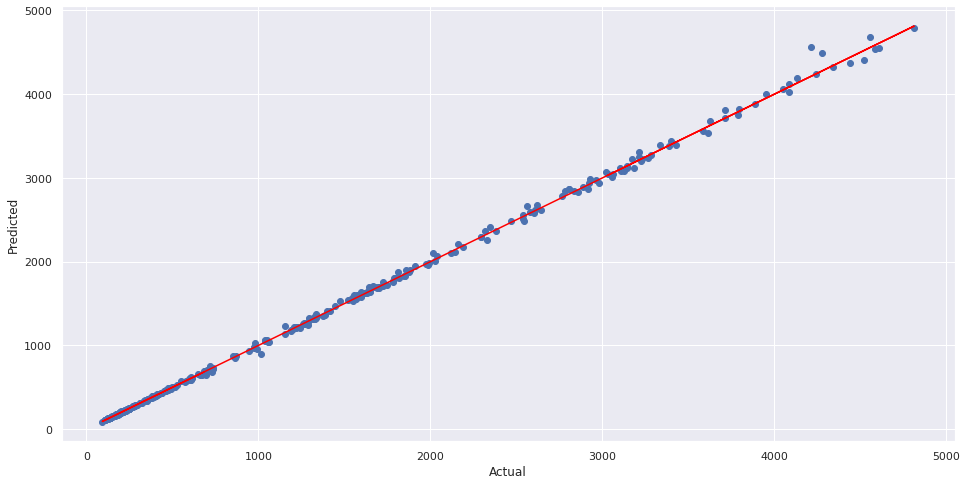

In [38]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot the predicted percentage change in the Close price against the actual percentage change in the Close price
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##Evaluation

In [39]:
# Evaluate the model
#RMSE
rmse_l = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse_l)

Root Mean Squared Error:  32.61609503767176


In [40]:
# Get the accuracy of the best model using the test set
accuracy = r2_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 99.92%


#Seasonal Arima

SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) is a popular time series forecasting model that is an extension of the ARIMA model. SARIMAX is used for modeling time series data that has seasonal patterns along with other external variables that may influence the time series. It models the time series using the past values of the same time series and past values of external variables. The model is defined by the parameters (p, d, q)x(P, D, Q, s), where p, d, and q are parameters for the non-seasonal components of the model, P, D, and Q are parameters for the seasonal components, and s is the length of the seasonal cycle. SARIMAX can be used for forecasting future values of a time series as well as for identifying the impact of exogenous variables on the time series.

####Paramters configuration

In [41]:
sarima_params = {
    'order': (1, 1, 1),
    'seasonal_order': (0, 1, 1, 12)
}

##Prediction

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
train_data,test_data=df2[:'2021-12-31'],df2['2022-01-01':]
# SARIMAX model
# create exogenous variables for training set
exog_train = train_data[['Open', 'High', 'Low']].values.reshape(-1, 3)
model_sarimax = SARIMAX(train_data['Close'], exog=exog_train, order=(1,1,1), seasonal_order=(0,1,1,12))
model_sarimax_fit = model_sarimax.fit()

In [43]:
# predict future prices using SARIMAX model
exog_test = test_data[['Open', 'High', 'Low']].values.reshape(-1, 3)
predict_sarimax = model_sarimax_fit.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_test)

Text(0.5, 1.0, 'Ethereum Price Prediction')

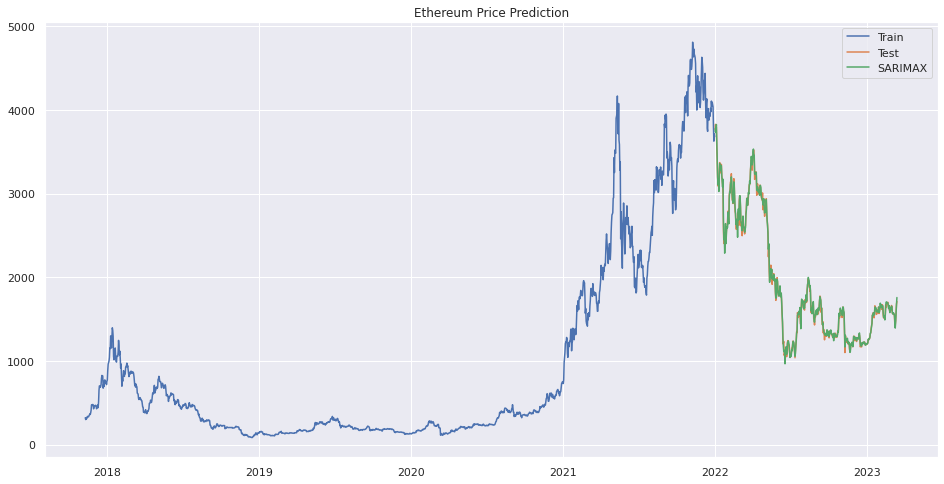

In [44]:
plt.figure(figsize=(16,8))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, predict_sarimax, label='SARIMAX')
plt.legend(loc='best')
plt.title('Ethereum Price Prediction')

##Evaluation

In [45]:
# Compute the root mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data['Close'], predict_sarimax)
rmse_s = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse_s:.2f}')

Root Mean Squared Error: 34.94


In [46]:
accuracy = r2_score(test_data['Close'], predict_sarimax) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 99.77%


#Fbprophet

Facebook Prophet is a time-series forecasting model developed by Facebook's Data Science team. It is designed to make time-series forecasting accessible to non-experts by providing a simple and intuitive interface for trend, seasonality, and holiday modeling.
Prophet has become popular for its ease of use, flexibility, and ability to handle a wide range of time-series data. It is widely used in industries such as finance, retail, and e-commerce for demand forecasting, inventory planning, and budgeting.

In [47]:
from prophet import Prophet

In [48]:
eth_data=data.reset_index()

##Paramters configuration

In [49]:
data = eth_data[['Date', 'Close']]
data.columns = ['ds', 'y']

##Prediction

In [50]:
model = Prophet()
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4nj1o32k/3ups2v1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4nj1o32k/eo8_zoeg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62494', 'data', 'file=/tmp/tmp4nj1o32k/3ups2v1s.json', 'init=/tmp/tmp4nj1o32k/eo8_zoeg.json', 'output', 'file=/tmp/tmp4nj1o32k/prophet_model20kbkrgy/prophet_model-20230314194019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:40:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:40:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
# Define the number of days to forecast
future = model.make_future_dataframe(periods=30)

In [52]:
# Generate forecast
forecast = model.predict(future)

Text(0.5, 1.0, 'Ethereum Price Forecast')

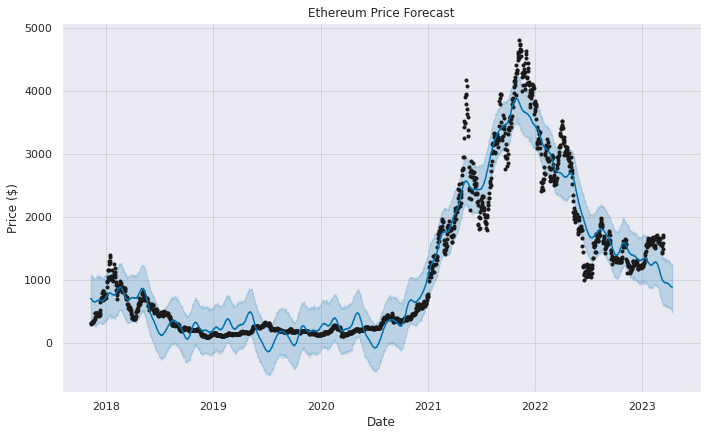

In [53]:
# Plot the forecast
model.plot(forecast, xlabel='Date', ylabel='Price ($)')
plt.title('Ethereum Price Forecast')

##Evaluation

In [54]:
from sklearn.metrics import mean_squared_error
# Calculate root mean squared error (RMSE)
y_true = data['y']
y_pred = forecast['yhat'][:-30]
rmse_p = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: {:.2f}'.format(rmse_p))

RMSE: 283.84


In [55]:
# Print the forecast for the next week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1975,2023-04-07,895.325577,551.788647,1260.406785
1976,2023-04-08,895.271704,534.143757,1258.600731
1977,2023-04-09,892.925326,535.450610,1240.312434
1978,2023-04-10,889.068080,520.151775,1239.399094
1979,2023-04-11,886.192231,546.049198,1229.237430
1980,2023-04-12,885.121718,478.002664,1252.845440
1981,2023-04-13,876.106267,499.495209,1244.112281


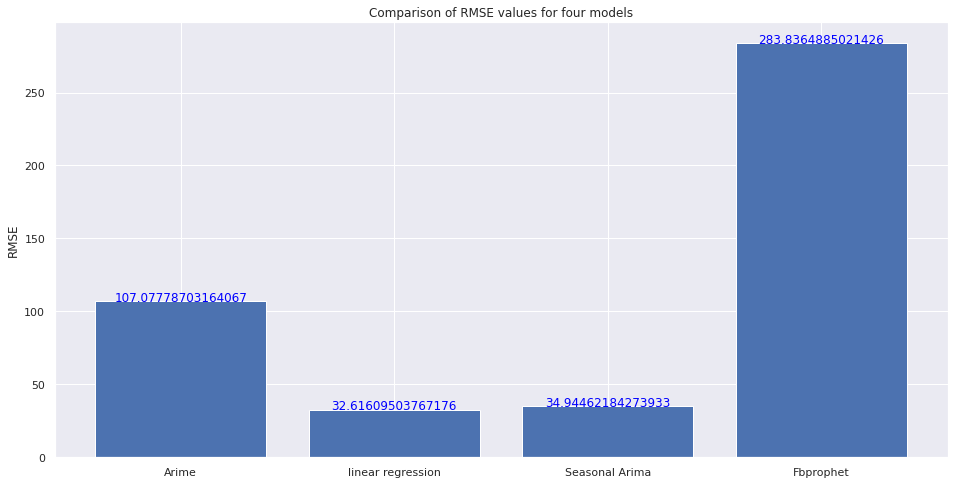

In [56]:

rmse_values = [rmse_a, rmse_l, rmse_s, rmse_p] # replace with your actual RMSE values
labels = ['Arime', 'linear regression', 'Seasonal Arima', 'Fbprophet']

plt.bar(labels, rmse_values)
plt.ylabel('RMSE')
plt.title('Comparison of RMSE values for four models')

for i, v in enumerate(rmse_values):
    plt.text(i, v+0.1, str(v), color='blue', ha='center')

plt.show()
